- `jupyter nbconvert pytorch_tutorial.ipynb --to slides --post serve --ServePostProcessor.port=8889 --SlidesExporter.reveal_scroll=True`

<img src="images/ods.png" />
- http://pavelnesterov.info/
- http://www.meetup.com/Dubai-Data-Science-Meetup/ 
- https://github.com/mephistopheies/dds/tree/master/ibm_290618

| Pavel Nesterov  | Data Scientist  |
|---|---|
| <img src="images/r2.png" />  | <img src="images/r1.png" />  |
- http://reaktor.com/

# Plan

- Framework for Deep Learning
- Automatic Differentiation
- PyTorch Overview
- Logistic Regression 
- Generative Adversarial Networks

In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("dark")
plt.rcParams['figure.figsize'] = 16, 12

In [2]:
plt.rcParams['figure.figsize'] = 16, 12

<img src="images/allframeworks.png" />

# Computational graph

| Addition  | Affine transformation  |
|---|---|
| <img src="images/addition.png" />  | <img src="images/affine_transformation.png" />  |

# Functions of a deep learning framework

Any DL framework have support:
- definition of a computaional graph
- differentiation of a computational graph
- evaluation of a computational graph

# Types of deep learning frameworks

<img src="images/frameworks.png" width=640 />

<img src="images/mytorch.png" />

## Simple function

$$\Large
\begin{array}{rcl}
f\left(x, y\right) = y + y x + y x^2
\end{array}
$$

In [3]:
# let's define a function

def f(x, y):
    return y + y*x + y*x**2

print('f(3, 2) =', f(3, 2))

f(3, 2) = 26


## Analytic derivative of the function

$$\Large
\begin{array}{rcl}
\dfrac{\partial}{\partial x} f\left(x, y\right) = ?
\end{array}
$$

## Analytic derivative of the function

$$\Large
\begin{array}{rcl}
\dfrac{\partial}{\partial x} f\left(x, y\right) = y + 2 y x
\end{array}
$$

In [4]:
# let's define function which returns its derivative wrt x evaluated at a point

def df_dx(x, y):
    return y + 2*y*x

print('df_dx(x, y) =', df_dx(3, 2))

df_dx(x, y) = 14


## Chain rule

$$\Large
\begin{array}{rcl}
\left(f \circ g\right)' &=& \left(f' \circ g\right)\cdot g' \\
\dfrac{\partial f\left(g\left(x\right)\right)}{\partial x} &=& \dfrac{\partial f\left(g\left(x\right)\right)}{\partial g\left(x\right)}\cdot\dfrac{\partial g\left(x\right)}{\partial x}
\end{array}
$$

## Function as Directed Acyclic Graph
- each node is an elementary function
$$\Large
\begin{array}{rcl}
f\left(x, y\right) &=& y + y x + y x^2 \\
g_1\left(x, y\right) &=& x \\
g_2\left(x, y\right) &=& y \\
g_3\left(x, y\right) &=& x^2 = g_1^2 \\
g_4\left(x, y\right) &=& y \cdot x = g_2 \cdot g_1 \\
g_5\left(x, y\right) &=& y + y \cdot x = g_2 + g_4 \\
g_6\left(x, y\right) &=& y \cdot x^2 = g_2 \cdot g_3 \\
g_7\left(x, y\right) &=& f\left(x, y\right) = g_5 + g_6 \\
\end{array}
$$

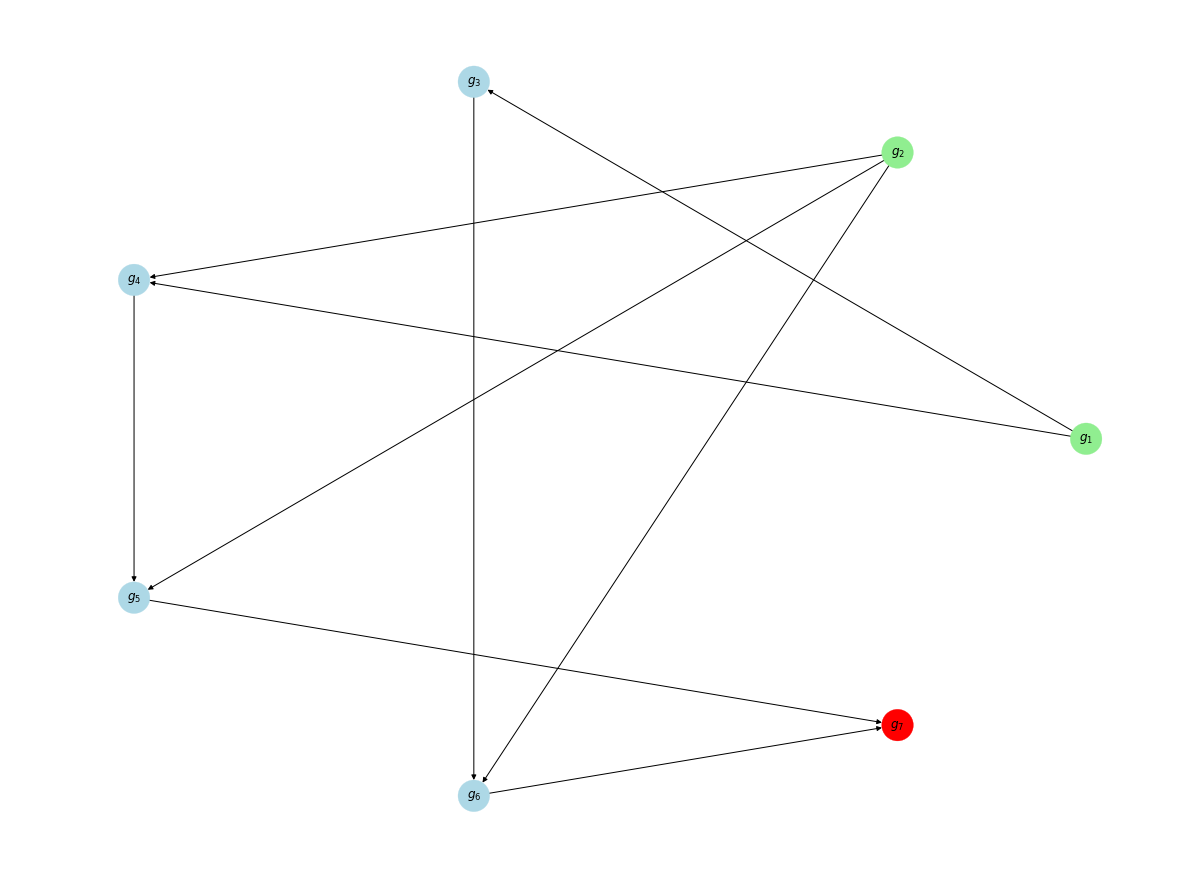

In [5]:
# let's draw computational graph
import networkx as nx

G = nx.OrderedDiGraph()
G.add_node(r'$g_1$')
G.add_node(r'$g_2$')
G.add_node(r'$g_3$')
G.add_edge(r'$g_1$', r'$g_3$')
G.add_node(r'$g_4$')
G.add_edge(r'$g_1$', r'$g_4$')
G.add_edge(r'$g_2$', r'$g_4$')
G.add_node(r'$g_5$')
G.add_edge(r'$g_2$', r'$g_5$')
G.add_edge(r'$g_4$', r'$g_5$')
G.add_node(r'$g_6$')
G.add_edge(r'$g_3$', r'$g_6$')
G.add_edge(r'$g_2$', r'$g_6$')
G.add_node(r'$g_7$')
G.add_edge(r'$g_5$', r'$g_7$')
G.add_edge(r'$g_6$', r'$g_7$')
color_map = []
for node in G:
    if node == r'$g_1$' or node == r'$g_2$':
        color_map.append('lightgreen')
    elif node == r'$g_7$':
        color_map.append('red')
    else:
        color_map.append('lightblue')

nx.draw_circular(G, with_labels=True, node_size=1000, node_color=color_map)

## Differentiation of elementary funtions
$$\Large
\begin{array}{rcl}
\dfrac{\partial g_1}{\partial x} &=& \left. \dfrac{\partial}{\partial x} x = 1 \right|_{x=3, y=2} = 1 \\ \\
\dfrac{\partial g_2}{\partial x} &=& \left. \dfrac{\partial}{\partial x} y = 0 \right|_{x=3, y=2} = 0 \\ \\
\dfrac{\partial g_3}{\partial x} &=& \left. \dfrac{\partial}{\partial x} g_1^2 = 2 g_1 \dfrac{\partial g1}{\partial x} = 2x \right|_{x=3, y=2} = 6 \\ \\
\dfrac{\partial g_4}{\partial x} &=& \left. \dfrac{\partial}{\partial x} g_2 \cdot g_1 = g_2 \dfrac{\partial g_1}{\partial x} + \dfrac{\partial g_2}{\partial x} g_1 = g_2 = y \right|_{x=3, y=2} = 2 \\ \\
\dfrac{\partial g_5}{\partial x} &=& \left. \dfrac{\partial}{\partial x}\left(g_2 + g_4\right) = \dfrac{\partial g_2}{\partial x} + \dfrac{\partial g_4}{\partial x} = g_2 = y \right|_{x=3, y=2} = 2 \\ \\
\dfrac{\partial g_6}{\partial x} &=& \left. \dfrac{\partial}{\partial x} g_2 \cdot g_3 = g_2 \dfrac{\partial g_3}{\partial x} + \dfrac{\partial g_2}{\partial x} g_3 = y \cdot 2x \right|_{x=3, y=2} = 12 \\ \\
\dfrac{\partial g_7}{\partial x} &=& \left. \dfrac{\partial}{\partial x}\left(g_5 + g_6\right) = \dfrac{\partial g_5}{\partial x} + \dfrac{\partial g_6}{\partial x} = y + 2xy \right|_{x=3, y=2} = 14 \\ \\
\dfrac{\partial f}{\partial x} &=& \left. \dfrac{\partial f}{\partial g_7} \cdot \dfrac{\partial g_7}{\partial x} = y + 2xy \right|_{x=3, y=2} = 14
\end{array}
$$

## Auto differentiation
- we calculate value of the function and its derivative w.r.t. $x$ in a point **simultaneously**

In [6]:
# let's write a class which can automaticall calculate derivative wrt x

class Variable:
    
    def __init__(self, value, derivative):
        self.value = value
        self.derivative = derivative

    def __add__(self, other):
        return Variable(
            self.value + other.value,
            self.derivative + other.derivative
        )
    
    def __mul__(self, other):
        return Variable(
            self.value * other.value,
            self.derivative * other.value + self.value * other.derivative
        )

    def __pow__(self, other):
        return Variable(
            self.value ** other,
            other * self.value ** (other - 1)
        )
    
    def __repr__(self):
        return 'v=%s, d=%s' % (str(self.value), str(self.derivative))

In [7]:
# let's compare AD result with analytical calculation

var_x = Variable(3, 1)
var_y = Variable(2, 0)

var_y + var_y*var_x + var_y*var_x**2

v=26, d=14

<img src="images/pytorch.png" />

In [8]:
import numpy as np

import torch
from torch.autograd import Variable

In [9]:
# now let's use pyTorch Variable instead ours

x = torch.FloatTensor(np.array([3]))
y = torch.FloatTensor(np.array([2]))

var_x = Variable(x, requires_grad=True)
var_y = Variable(y, requires_grad=True)

z = var_y + var_y*var_x + var_y*var_x**2
z.backward()

print(z, var_x.grad, var_y.grad)

tensor([ 26.]) tensor([ 14.]) tensor([ 13.])


<img src="images/tensor.png" width=640 />

- A **torch.Tensor** is a multi-dimensional matrix containing elements of a single data type.
  - https://pytorch.org/docs/stable/tensors.html
- behaviour of **torch.Tensor** is more or less similar to what you expect from numpy
  - constructors, type conversion, indexing, etc

|Data type | dtype | CPU tensor |
|----------|-------|------------|
|32-bit floating point | torch.float32 or torch.float | torch.FloatTensor |
|64-bit floating point | torch.float64 or torch.double | torch.DoubleTensor |
|16-bit floating point | torch.float16 or torch.half | torch.HalfTensor |
|8-bit integer (unsigned) | torch.uint8 | torch.ByteTensor |
|8-bit integer (signed) | torch.int8 | torch.CharTensor |
|16-bit integer (signed) | torch.int16 or torch.short | torch.ShortTensor |
|32-bit integer (signed) | torch.int32 or torch.int | torch.IntTensor |
|64-bit integer (signed) | torch.int64 or torch.long | torch.LongTensor |


In [10]:
# we can crate tensor given size with a garbage

x = torch.IntTensor(4, 2)

print(x.shape)
print(x.dtype)
print(x)

torch.Size([4, 2])
torch.int32
tensor([[ 8.6063e+08,  3.2683e+04],
        [ 8.6074e+07,  0.0000e+00],
        [ 5.6951e+07,  1.5693e+05],
        [-2.0972e+09,  1.6778e+09]], dtype=torch.int32)


In [11]:
# we can crate tensor from list

x = torch.IntTensor([[1, 2], [3, 4]])

print(x.shape)
print(x.dtype)
print(x)

torch.Size([2, 2])
torch.int32
tensor([[ 1,  2],
        [ 3,  4]], dtype=torch.int32)


In [12]:
# we can crate tensor numpy

x = torch.from_numpy(
    np.random.binomial(10, 0.25, size=(3, 2)).astype(np.uint8)
)

print(x.shape)
print(x.dtype)
print(x)

torch.Size([3, 2])
torch.uint8
tensor([[ 1,  2],
        [ 3,  0],
        [ 1,  0]], dtype=torch.uint8)


In [13]:
# we can init tensor with zeros or ones of selected type

x = torch.zeros((3, 2), dtype=torch.float64)
y = torch.ones((3, 2), dtype=torch.float64)

print(x.shape)
print(x.dtype)
print(x)

torch.Size([3, 2])
torch.float64
tensor([[ 0.,  0.],
        [ 0.,  0.],
        [ 0.,  0.]], dtype=torch.float64)


In [14]:
# we can init tensor with any value

x = torch.FloatTensor(3, 2).fill_(11)

print(x.shape)
print(x.dtype)
print(x)

torch.Size([3, 2])
torch.float32
tensor([[ 11.,  11.],
        [ 11.,  11.],
        [ 11.,  11.]])


In [15]:
# we can sample random tensor from a distribution

x = torch.zeros((3, 2, 2), dtype=torch.float32).normal_(0, 1)

print(x.shape)
print(x.dtype)
print(x)

torch.Size([3, 2, 2])
torch.float32
tensor([[[ 0.1197, -1.0473],
         [ 1.2519,  0.1212]],

        [[-0.5082,  1.3682],
         [-0.0932,  0.0842]],

        [[ 0.8907, -1.1346],
         [ 1.4169, -0.3728]]])


In [16]:
# we can change type of tensor

x = torch.zeros((3, 2, 2), dtype=torch.float32).normal_(0, 1).double()

print(x.shape)
print(x.dtype)
print(x)

torch.Size([3, 2, 2])
torch.float64
tensor([[[-0.9461, -0.6885],
         [-0.2319,  0.2373]],

        [[ 1.0238,  1.0926],
         [ 0.8378, -0.5528]],

        [[ 1.6532,  0.0147],
         [-1.1967, -1.8558]]], dtype=torch.float64)


In [17]:
# you can reshape it (yes, it still will be differentiable)

x = torch.from_numpy(
    np.arange(12).astype(np.int32).reshape((3, 4))
).reshape((3, 2, 2))

print(x.shape)
print(x.dtype)
print(x)

torch.Size([3, 2, 2])
torch.int32
tensor([[[  0,   1],
         [  2,   3]],

        [[  4,   5],
         [  6,   7]],

        [[  8,   9],
         [ 10,  11]]], dtype=torch.int32)


In [18]:
# you ran index tensors an it would be numpy array

batch_size = 10
channels = 3
wight = 100
height = 100

batch = torch.FloatTensor(batch_size, channels, wight, height).normal_(0, 1)

print(batch.shape)
print(batch.dtype)
print(batch[1, 1, :4, :4])

torch.Size([10, 3, 100, 100])
torch.float32
tensor([[-1.7511, -1.9323, -0.0704,  0.0121],
        [-0.7324, -0.6079, -1.8542,  1.3260],
        [-0.7208,  0.2703,  0.1726, -0.3387],
        [-0.9872, -1.3446,  2.3588,  0.1193]])


# Operations 
<img src="images/implicit.png" width=640 />

In [19]:
# if operation doesn't change shape and type then it has inplace alternative

x = torch.ones((2, 2), dtype=torch.float32)
y = torch.ones((2, 2), dtype=torch.float32)

z = x.add(y)
z = torch.add(x, y)
z = x + y
x.add_(y)

tensor([[ 2.,  2.],
        [ 2.,  2.]])

Too many of different operations:
- Point-wise operations
  - `abs`, `cos`, `atan`, ...
- Reduction operations
  - `cumsum`, `mean`, `sum`, ...
- Comparison operation
  - `eq`, `ge`, `max`, ...
- Matrix-Matrix operations
  - `dot`, `addmm`, ...
- ...

# Broadcasting
<img src="images/broadcasting.png" width=640 />

Two tensors are _broadcastable_ if the following rules hold:
- Each tensor has at least one dimension.
- When iterating over the dimension sizes, starting at the trailing dimension, the dimension sizes must either be equal, one of them is 1, or one of them does not exist.

If two tensors `x`, `y` are _broadcastable_, the resulting tensor size is calculated as follows:
- If the number of dimensions of x and y are not equal, prepend 1 to the dimensions of the tensor with fewer dimensions to make them equal length.
- Then, for each dimension size, the resulting dimension size is the max of the sizes of x and y along that dimension.

https://pytorch.org/docs/stable/notes/broadcasting.html

In [20]:
# image normalization, straightforward way

batch_size = 10
channels = 3
wight = 100
height = 100

batch = torch.FloatTensor(batch_size, channels, wight, height).fill_(2)
print(batch.shape)

r_mean = torch.FloatTensor(100, 100).fill_(1)
g_mean = torch.FloatTensor(100, 100).fill_(1)
b_mean = torch.FloatTensor(100, 100).fill_(1)
rgb_mean = torch.stack(
    [torch.stack([r_mean, g_mean, b_mean])]*batch.shape[0]
)
print(rgb_mean.shape)
print(np.prod(rgb_mean.shape))

print((batch - rgb_mean)[0, 0, :3, :3])

torch.Size([10, 3, 100, 100])
torch.Size([10, 3, 100, 100])
300000
tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])


In [21]:
# image normalization, broadcasting way

batch_size = 10
channels = 3
wight = 100
height = 100

batch = torch.FloatTensor(batch_size, channels, wight, height).fill_(2)
print(batch.shape)

rgb_mean = torch.FloatTensor([1, 1, 1]).reshape((3, 1, 1))
print(rgb_mean.shape)

print((batch - rgb_mean)[0, 0, :3, :3])

torch.Size([10, 3, 100, 100])
torch.Size([3, 1, 1])
tensor([[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]])


In [22]:
# numpy <-> tensor

x = torch.ones((3, 2))
y = x.numpy()
z = torch.from_numpy(y)

# Using GPU
<img src="images/gpu.jpg" width=480 />

In [23]:
x = torch.FloatTensor(1500, 3, 224, 224)
print(x.is_cuda)
print(np.prod(x.shape)*4/1024**2)
print(torch.cuda.memory_allocated()/1024**2)

False
861.328125
0.8251953125


In [24]:
!nvidia-smi

Fri Jun 29 02:52:35 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.81                 Driver Version: 384.81                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:02:00.0 Off |                  N/A |
|  0%   50C    P0    47W / 240W |     10MiB /  8112MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:03:00.0 Off |                  N/A |
|  0%   38C    P2    73W / 320W |    521MiB / 11172MiB |     16%      Default |
+-------------------------------+----------------------+----------------------+
        

In [25]:
x = x.cuda()
print(x.is_cuda)

True


In [26]:
!nvidia-smi

Fri Jun 29 02:52:35 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.81                 Driver Version: 384.81                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:02:00.0 Off |                  N/A |
|  0%   50C    P0    47W / 240W |     10MiB /  8112MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:03:00.0 Off |                  N/A |
|  0%   40C    P2    96W / 320W |   1383MiB / 11172MiB |     58%      Default |
+-------------------------------+----------------------+----------------------+
        

In [27]:
print(np.prod(x.shape)*4/1024**2)
print(torch.cuda.memory_allocated()/1024**2)

861.328125
862.2001953125


In [28]:
x = x.cpu()
print(x.is_cuda)
print(torch.cuda.memory_allocated()/1024**2)

False
0.8251953125


In [29]:
import gc
del(x)
gc.collect()

print(torch.cuda.memory_allocated()/1024**2)

0.8251953125


In [30]:
!nvidia-smi

Fri Jun 29 02:52:36 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.81                 Driver Version: 384.81                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:02:00.0 Off |                  N/A |
|  0%   50C    P0    47W / 240W |     10MiB /  8112MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:03:00.0 Off |                  N/A |
|  0%   40C    P2    96W / 320W |   1383MiB / 11172MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [31]:
with torch.cuda.device(0):
    x = torch.FloatTensor(1500, 3, 224, 224).cuda()
with torch.cuda.device(1):
    y = torch.FloatTensor(1500, 3, 224, 224).cuda()

In [32]:
!nvidia-smi

Fri Jun 29 02:52:40 2018       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 384.81                 Driver Version: 384.81                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 00000000:02:00.0 Off |                  N/A |
|  0%   50C    P2    45W / 240W |   1343MiB /  8112MiB |     39%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 108...  Off  | 00000000:03:00.0 Off |                  N/A |
|  0%   39C    P2    73W / 320W |   1383MiB / 11172MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [33]:
del(x, y)
gc.collect()

175

# pyTorch = Numpy + AD + GPU

<img src="images/puzzle.jpg" width=640 />

In [34]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

data = load_iris()
data.data = StandardScaler().fit_transform(data.data)
print(data.data.shape)
print(data.feature_names)
print(data.data[:5, :])
print(data.target_names)
print('Target:')
print(pd.Series(data.target).value_counts())

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[-0.90068117  1.03205722 -1.3412724  -1.31297673]
 [-1.14301691 -0.1249576  -1.3412724  -1.31297673]
 [-1.38535265  0.33784833 -1.39813811 -1.31297673]
 [-1.50652052  0.10644536 -1.2844067  -1.31297673]
 [-1.02184904  1.26346019 -1.3412724  -1.31297673]]
['setosa' 'versicolor' 'virginica']
Target:
2    50
1    50
0    50
dtype: int64


# Logistic Regression

Assume we have $K$ classes and $N$ sample in a dataset $D$:

$$\Large
\begin{array}{rcl}
P\left(y = k \mid \vec{x}\right) &=& \dfrac{P\left(\vec{x} \mid y = k\right)P\left(y = k\right)}{\sum_{i = 1}^k P\left(\vec{x} \mid y = i\right)P\left(y = i\right)} \\
P\left(y = k \mid \vec{x}\right) &=& \dfrac{e^{\vec{w}_k \cdot \vec{x}}}{\sum_{i = 1}^k e^{\vec{w}_i \cdot \vec{x}}} = \text{softmax}\left(\vec{w}_k \cdot \vec{x}\right) \\
\hat{p}_{kn} &=& P\left(y = k \mid \vec{x}_n\right)
\end{array}
$$

# Cost function

We use cross entropy as a loss, assume that we have :

$$\Large
\begin{array}{rcl}
\mathcal{L}\left(D\right) &=& -\sum_{n=1}^N \sum_{k=1}^K p_{kn} \log \hat{p}_{kn} \\
&=& -\sum_{n=1}^N \sum_{k=1}^K I\left[y = k\right] \log P\left(y = k \mid \vec{x}_n\right)
\end{array}
$$

In [35]:
# prepare data matrix
X = torch.from_numpy(np.column_stack([np.ones(data.data.shape[0]), data.data])).float()

# prepare target variable
y = data.target

# initialize parameters of the logistic regression
W = Variable(
    torch.FloatTensor(X.shape[1], np.unique(y).shape[0]).normal_(0, 0.1), 
    requires_grad=True)

print(W)

tensor([[-0.0570,  0.0655, -0.0612],
        [ 0.1222, -0.0998,  0.0213],
        [ 0.0101, -0.0184,  0.1164],
        [-0.0446,  0.0064, -0.0962],
        [-0.2365,  0.0560, -0.0109]])


In [36]:
from tqdm import tqdm_notebook

# parameters of learning algorithm - SGD
learning_rate = 0.001
n_epoches = 100
tolerance = 1e-8

# logging
loss_glog = []
acc_glob = []

# epoch - one pass through dataset
for ix_epoch in tqdm_notebook(range(n_epoches)):
    acc_epoch = 0
    loss_epoch = 0
    # iterate over dataset
    for n in np.random.choice(range(X.shape[0]), size=X.shape[0]):
        # prepare variable without gradients
        x = Variable(X[n, :])

        # compute softmax
        log_p = torch.mv(W.t(), x)
        p_numerator = torch.exp(log_p)
        p_denominator = p_numerator.sum()
        p = p_numerator/p_denominator

        # check prediction
        k = p.argmax(0).item()
        acc_epoch += y[n] == k

        # compute loss
        loss = -torch.log(
            torch.clamp(p[y[n]], tolerance, 1 - tolerance)
        )
        loss_epoch += loss.item()

        # propagate grawients - modify current parameters
        loss.backward()
        W.data -= learning_rate*W.grad
        W.grad.zero_()
        
    # save epoch stats
    acc_glob.append(acc_epoch/X.shape[0])
    loss_glog.append(loss_epoch/X.shape[0])

HBox(children=(IntProgress(value=0), HTML(value='')))

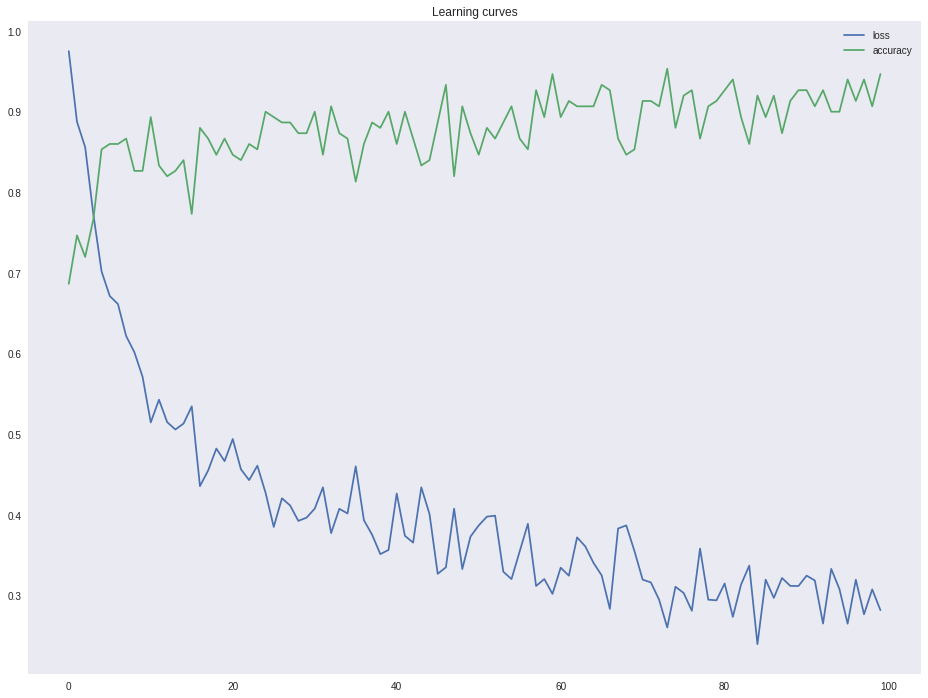

In [37]:
# plot logs
plt.plot(loss_glog, label='loss')
plt.plot(acc_glob, label='accuracy')
plt.legend()
plt.title('Learning curves')
plt.show()

# Logistic regression = NN with one linear layer + Softmax activation

<img src="images/lr.png" />

In [38]:
from torch import nn
from torch import optim

# create one linear layer 
model = nn.Sequential()
model.add_module(
    'linear',
    nn.Linear(X.shape[1], np.unique(y).shape[0], bias=False)
)

# create cross entropy loss
criterion = nn.CrossEntropyLoss()

# create SGD optimizer without momentum
optimizer = optim.SGD(
    model.parameters(), 
    lr=0.01, 
    momentum=0.0
)

loss_glog = []
acc_glob = []

for ix_epoch in tqdm_notebook(range(n_epoches)):
    acc_epoch = 0
    loss_epoch = 0
    for n in np.random.choice(range(X.shape[0]), size=X.shape[0]):
        x = Variable(X[n, :].reshape(1, X.shape[1]))
        yi = Variable(torch.from_numpy(np.array([y[n]]).astype(np.int64)))
        
        # calculate log of probabilities
        log_p = model(x)
        
        # calculate loss
        loss = criterion(log_p, yi)
        
        # make gradient step
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        loss_epoch += loss.item()
        k = log_p.argmax(1).item()
        acc_epoch += y[n] == k
        
    acc_glob.append(acc_epoch/X.shape[0])
    loss_glog.append(loss_epoch/X.shape[0])

HBox(children=(IntProgress(value=0), HTML(value='')))

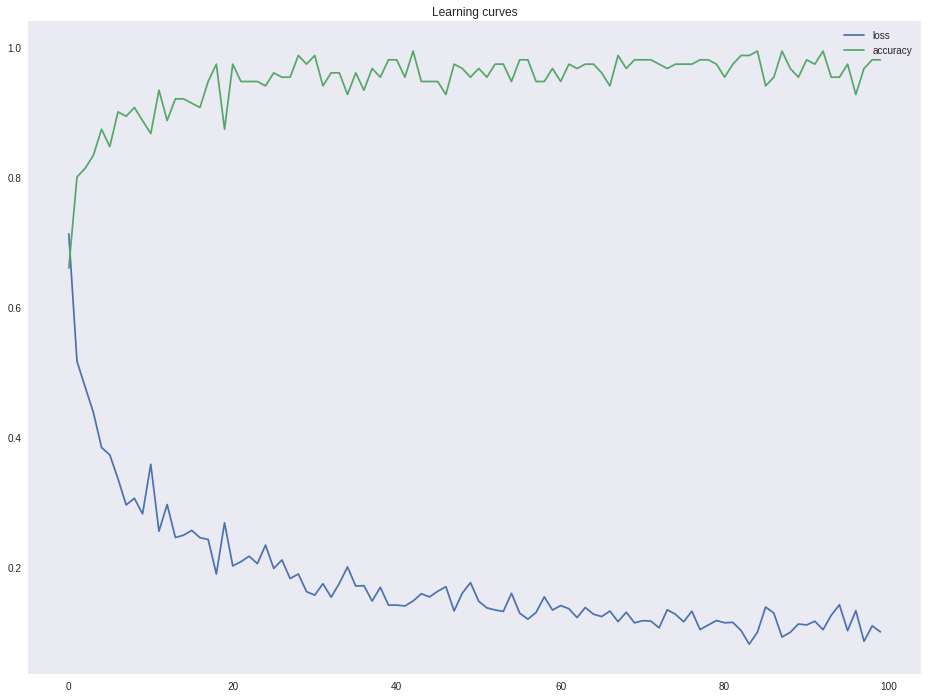

In [39]:
plt.plot(loss_glog, label='loss')
plt.plot(acc_glob, label='accuracy')
plt.legend()
plt.title('Learning curves')
plt.show()

# Module: torch.nn
- Containers
  - `nn.Sequential`
  - `nn.ModuleList`
  - ...
- Convolution layers
  - `nn.Conv2d`
  - `nn.ConvTranspose2d`
  - ...
- Pooling layers
  - `nn.MaxPool2d`
  - `nn.AvgPool3d`
  - ...
- Padding layers
  - `nn.ReflectionPad1d`
  - `nn.ZeroPad2d`
  - ...
- Non-linear activations
  - `nn.Sigmoid`
  - `nn.ReLU6`
  - ...
- Normalization layers
  - `nn.BatchNorm2d`
  - `nn.LocalResponseNorm`
  - ...
- Recurrent layers
  - `nn.LSTM`
  - `nn.GRU`
  - ...
- Other layers
  - Dropout layers
  - Sparse layers
- Distance functions
- Loss functions
- Vision layers
- DataParallel layers

# Module: torch.optim

- `optim.Adadelta`
  - ADADELTA: An Adaptive Learning Rate Method
- `optim.Adagrad`
  - Adaptive Subgradient Methods for Online Learning and Stochastic Optimization
- `optim.Adam`
  - Adam: A Method for Stochastic Optimization
- `optim.SparseAdam`
- `optim.Adamax`
  - Adam: A Method for Stochastic Optimization
- `optim.ASGD`
  -  Acceleration of stochastic approximation by averaging
- `torch.optim.LBFGS`
- `optim.RMSprop`
- `optim.Rprop`
- `optim.SGD`
  - On the importance of initialization and momentum in deep learning

## Adjusting LR
- `optim.lr_scheduler.LambdaLR`
- `optim.lr_scheduler.StepLR`
- `optim.lr_scheduler.MultiStepLR`
- ...

# Generative Adversarial Networks
<img src="images/gan.png" width=640 />

# GAN cost function

## Original cost

$$\Large
\begin{array}{rcl}
\min_G \max_D V\left(D, G\right) &=& \mathbb{E}_{x \sim p_{\text{data}}\left(x\right)} \left[\log D\left(x\right)\right] + \mathbb{E}_{z \sim p_z\left(z\right)}\left[\log\left(1 - D\left(G\left(z\right)\right)\right)\right]
\end{array}
$$

## Modified cost
$$\Large
\begin{array}{rcl}
\max_D V\left(D, G\right) &=&  \mathbb{E}_{x \sim p_{\text{data}}\left(x\right)} \left[\log\left(D\left(x\right)\right)\right] + \mathbb{E}_{z \sim p_z\left(z\right)}\left[\log\left(1 - D\left(G\left(z\right)\right)\right)\right] \\
\max_G V\left(D, G\right) &=& \mathbb{E}_{z \sim p_z\left(z\right)}\left[\log\left(D\left(G\left(z\right)\right)\right)\right]
\end{array}
$$



In [40]:
from torchvision import datasets
from torchvision import transforms

# use one of available datasets
ds = datasets.MNIST(
    '/home/mephistopheies/tmp/mnist/', 
    download=True,
    transform=transforms.ToTensor()
)


print(len(ds))

60000


torch.Size([1, 28, 28])


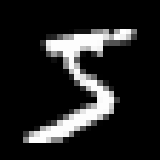

In [41]:
from PIL import Image

img, y = ds[0]

print(img.shape)

Image.fromarray((img[0, :, :].numpy()*255).astype(np.uint8)).resize((160, 160))

In [42]:
# move whole dataset to GPU memory
ds = torch.utils.data.TensorDataset(
    torch.stack([(ds[i][0]*2 - 1) for i in range(len(ds))]).cuda(),
    torch.stack([ds[i][1] for i in range(len(ds))]).cuda()
)

print(len(ds))

60000


In [43]:
import itertools as it

batch_size = 500

# create data loader without multithreading
data_loader = torch.utils.data.DataLoader(    
        ds,
        batch_size=batch_size, 
        shuffle=True,
        num_workers=0,
        pin_memory=False
)

for X, y in tqdm_notebook(data_loader, total=int(np.floor(len(ds)/batch_size)) + 1):
    print(X.shape, X.is_cuda)
    print(y.shape, y.is_cuda)
    break
    
# infinite source of data
data_loader_cycle = it.cycle(data_loader)

HBox(children=(IntProgress(value=0, max=121), HTML(value='')))

torch.Size([500, 1, 28, 28]) True
torch.Size([500]) True



In [44]:
# initializaton of weights
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)

torch.Size([25, 25])
torch.Size([25, 243])
torch.Size([25, 3, 9, 9])
torch.Size([25, 6, 16, 16])
torch.Size([25, 9, 30, 30])
torch.Size([25, 1, 28, 28])


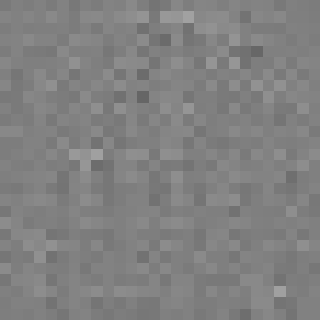

In [161]:
import torch.nn.functional as F
from collections import OrderedDict

input_dim = 25

class Generator(nn.Module):
    
    def __init__(self, input_dim=10):
        super(Generator, self).__init__()
        self.linear = nn.Linear(input_dim, 3*9*9, bias=False)
        self.bn1 = nn.BatchNorm1d(3*9*9)
        self.tconv1 = nn.ConvTranspose2d(
            in_channels=3, 
            out_channels=6, 
            kernel_size=4, 
            stride=2, 
            padding=2, 
            bias=False)
        self.bn2 = nn.BatchNorm2d(6)
        self.tconv2 = nn.ConvTranspose2d(
            in_channels=6, 
            out_channels=9, 
            kernel_size=4, 
            stride=2, 
            padding=2, 
            bias=False)
        self.bn3 = nn.BatchNorm2d(9)
        self.proj1 = nn.Conv2d(
            in_channels=9, 
            out_channels=3, 
            kernel_size=3, 
            stride=1, 
            padding=0, 
            bias=False)
        self.bn4 = nn.BatchNorm2d(3)
        self.proj2 = nn.Conv2d(
            in_channels=3, 
            out_channels=1, 
            kernel_size=3, 
            stride=1, 
            padding=1, 
            bias=False)
    
    def forward(self, X, debug=False):
        if debug: 
            print(X.shape)
        X = self.linear(X)
        if debug: 
            print(X.shape)
        X = self.bn1(X)
        X = F.relu(X)   
        X = X.view(-1, 3, 9, 9)
        if debug: 
            print(X.shape)
        X = self.tconv1(X)
        if debug: 
            print(X.shape)
        X = self.bn2(X)
        X = F.relu(X)
        X = self.tconv2(X)
        if debug: 
            print(X.shape)
        X = self.bn3(X)
        X = F.relu(X)
        X = self.proj1(X)
        X = self.bn4(X)
        X = F.relu(X)
        X = self.proj2(X)
        X = F.tanh(X)
        if debug: 
            print(X.shape)
        return X
    
generator = Generator(input_dim)
generator.apply(weights_init)


X = Variable(torch.FloatTensor(25, input_dim).normal_(0, 1))
X = generator(X, debug=True)

img = X[0, 0, :].data.numpy()

Image.fromarray((255*(img + 1)/2).astype(np.uint8)).resize((320, 320))

In [109]:
# https://discuss.pytorch.org/t/print-autograd-graph/692/16

from graphviz import Digraph


def make_dot(var, params):
    """ Produces Graphviz representation of PyTorch autograd graph
    
    Blue nodes are the Variables that require grad, orange are Tensors
    saved for backward in torch.autograd.Function
    
    Args:
        var: output Variable
        params: dict of (name, Variable) to add names to node that
            require grad (TODO: make optional)
    """
    param_map = {id(v): k for k, v in params.items()}
    print(param_map)
    
    node_attr = dict(style='filled',
                     shape='box',
                     align='left',
                     fontsize='12',
                     ranksep='0.1',
                     height='0.2')
    dot = Digraph(node_attr=node_attr, graph_attr=dict(size="12,12"))
    seen = set()
    
    def size_to_str(size):
        return '('+(', ').join(['%d'% v for v in size])+')'

    def add_nodes(var):
        if var not in seen:
            if torch.is_tensor(var):
                dot.node(str(id(var)), size_to_str(var.size()), fillcolor='orange')
            elif hasattr(var, 'variable'):
                u = var.variable
                node_name = '%s\n %s' % (param_map.get(id(u)), size_to_str(u.size()))
                dot.node(str(id(var)), node_name, fillcolor='lightblue')
            else:
                dot.node(str(id(var)), str(type(var).__name__))
            seen.add(var)
            if hasattr(var, 'next_functions'):
                for u in var.next_functions:
                    if u[0] is not None:
                        dot.edge(str(id(u[0])), str(id(var)))
                        add_nodes(u[0])
            if hasattr(var, 'saved_tensors'):
                for t in var.saved_tensors:
                    dot.edge(str(id(t)), str(id(var)))
                    add_nodes(t)
    add_nodes(var.grad_fn)
    return dot

{140369733069632: 'bn1.bias', 140369614309200: 'bn2.weight', 140368992824272: 'tconv1.weight', 140369614309344: 'bn2.bias', 140369614309776: 'proj1.weight', 140371627257928: 'bn1.running_var', 140369614310496: 'tconv2.weight', 140369614307472: 'bn4.running_mean', 140369614310640: 'bn4.bias', 140369614309128: 'proj2.weight', 140369614308984: 'bn3.bias', 140369589329424: 'linear.weight', 140369733069704: 'bn1.weight', 140369614310784: 'bn3.weight', 140369614308264: 'bn4.running_var', 140369614308408: 'bn3.running_var', 140368992533024: 'bn2.running_mean', 140369589207616: 'bn1.running_mean', 140371627260088: 'bn3.running_mean', 140369732034632: 'bn2.running_var', 140369614308192: 'bn4.weight'}


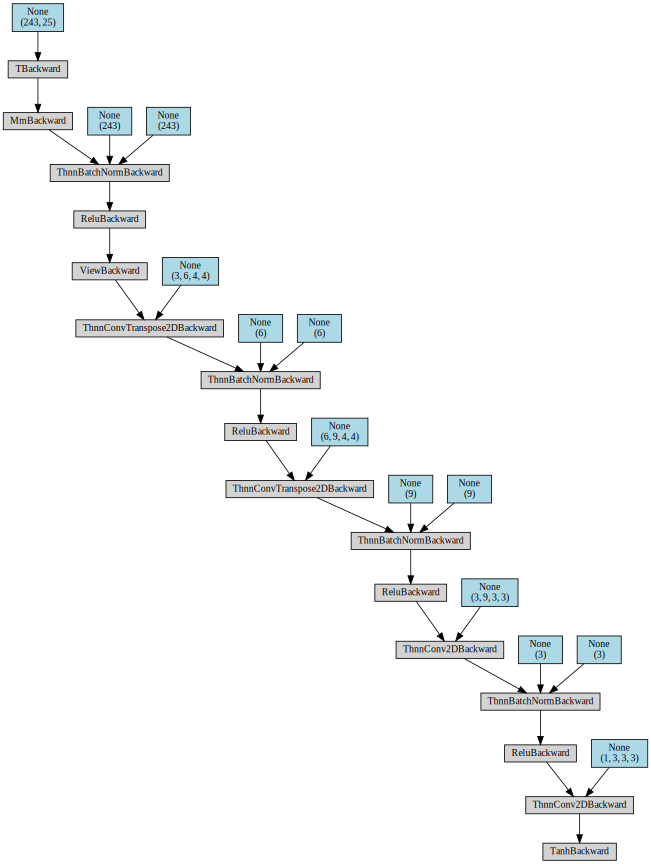

In [110]:
make_dot(X, generator.state_dict())

In [162]:
class Discriminator(nn.Module):
    
    def __init__(self, input_width=28, input_height=28):
        super(Discriminator, self).__init__()
        self.seq_conv = nn.Sequential(
            nn.Conv2d(1, 3, 4, 2, 0, bias=False),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(3, 6, 4, 2, 0, bias=False),
            nn.BatchNorm2d(6),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(6, 12, 4, 2, 1, bias=False),
            nn.BatchNorm2d(12),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Conv2d(12, 24, 2, 1, 0, bias=False),
            nn.BatchNorm2d(24),
            nn.LeakyReLU(0.1, inplace=True),
        )
        self.linear = nn.Linear(24, 1, bias=False)        
        
    def forward(self, X):
        X = self.seq_conv(X)
        X = X.view(-1, 24)
        X = self.linear(X)
        return F.sigmoid(X).view(-1)
    

discriminator = Discriminator()
discriminator.apply(weights_init)

print(discriminator(X).shape)

discriminator(X)

torch.Size([25])


tensor([ 0.5572,  0.5237,  0.4853,  0.7864,  0.4071,  0.3205,  0.4676,
         0.6298,  0.6439,  0.6004,  0.5324,  0.5440,  0.4710,  0.5593,
         0.3476,  0.5630,  0.3852,  0.4190,  0.5851,  0.5119,  0.5120,
         0.3363,  0.5964,  0.5910,  0.4275])

{140369731961984: 'seq_conv.0.weight', 140370429968672: 'seq_conv.2.weight', 140368992368176: 'seq_conv.9.running_var', 140369732034920: 'seq_conv.3.running_var', 140368992368248: 'seq_conv.5.weight', 140368992366736: 'seq_conv.9.running_mean', 140368992367888: 'seq_conv.9.bias', 140368992366880: 'seq_conv.6.running_var', 140368992367312: 'seq_conv.6.running_mean', 140368992823480: 'seq_conv.3.weight', 140368992368536: 'seq_conv.9.weight', 140368992367168: 'seq_conv.8.weight', 140368992370192: 'linear.weight', 140368992367672: 'seq_conv.6.bias', 140368992367384: 'seq_conv.6.weight', 140368992368824: 'seq_conv.3.bias', 140368992825208: 'seq_conv.3.running_mean'}


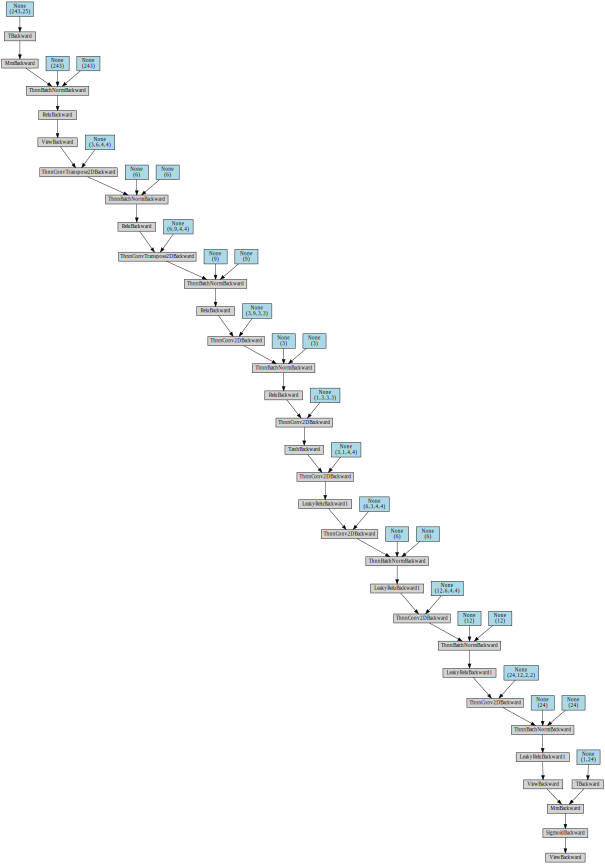

In [80]:
make_dot(discriminator(X), discriminator.state_dict())

In [163]:
lr_d = 0.0002
lr_g = 0.0005
beta1 = 0.5

# move models to GPU memory
discriminator = discriminator.cuda()
generator = generator.cuda()

# create Binary Crossentropy loss and move it to GPU
criterion = nn.BCELoss().cuda()

# create optimizers
optimizerD = optim.Adam(discriminator.parameters(), lr=lr_d, betas=(beta1, 0.999))
optimizerG = optim.Adam(generator.parameters(), lr=lr_g, betas=(beta1, 0.999))

In [164]:
n_iters = 5000

log_loss_d = []
log_loss_g = []

log_acc_d = []
log_acc_g = []

# switch models to train mode
generator.train()
discriminator.train()

# go through data
for ix_iter, (X, _) in tqdm_notebook(enumerate(data_loader_cycle), total=n_iters):
    # maximize log(D(x)) + log(1 - D(G(z)))
    # train with real
    discriminator.zero_grad()
    y_real = torch.ones(X.shape[0]).float().cuda()    
    p_real = discriminator(Variable(X))
    loss_d_real = criterion(p_real, y_real)
    loss_d_real.backward()
    p_real_mean = p_real.mean().item()

    # train with fake
    z_noise = torch.FloatTensor(X.shape[0], input_dim).normal_(0, 0.05).cuda()
    X_fake = generator(z_noise)
    y_fake = torch.zeros(X_fake.shape[0]).float().cuda()
    p_fake = discriminator(X_fake.detach())
    loss_d_fake = criterion(p_fake, y_fake)
    loss_d_fake.backward()
    p_fake_mean = p_fake.mean().item()
    loss_d = loss_d_real + loss_d_fake
    optimizerD.step()
    
    log_loss_d.append(loss_d.item())
    log_acc_d.append(
        ((p_real >= 0.5).float().mean().item() + (p_fake < 0.5).float().mean().item())/2
    )

    # maximize log(D(G(z)))
    # train fake as real
    log_loss_g_loc = []
    log_acc_g_loc = []
    for _ in range(2):
        generator.zero_grad()

        z_noise = torch.FloatTensor(X.shape[0]*2, input_dim).normal_(0, 0.05).cuda()
        X_fake = generator(z_noise)

        y_real_virt = torch.ones(X.shape[0]*2).float().cuda()
        p_real_virt = discriminator(X_fake)
        loss_g = criterion(p_real_virt, y_real_virt)
        loss_g.backward()

        for prm in discriminator.parameters():
            prm.grad = torch.clamp(prm.grad, -10, 10)

        p_real_virt_mean = p_real_virt.mean().item()
        optimizerG.step()
    
        log_loss_g_loc.append(loss_g.item())
        log_acc_g_loc.append(
            (p_real_virt >= 0.5).float().mean().item()
        )
        
    log_loss_g.append(np.mean(log_loss_g_loc))
    log_acc_g.append(np.mean(log_acc_g_loc))

    if ix_iter == n_iters:
        break

HBox(children=(IntProgress(value=0, max=5000), HTML(value='')))

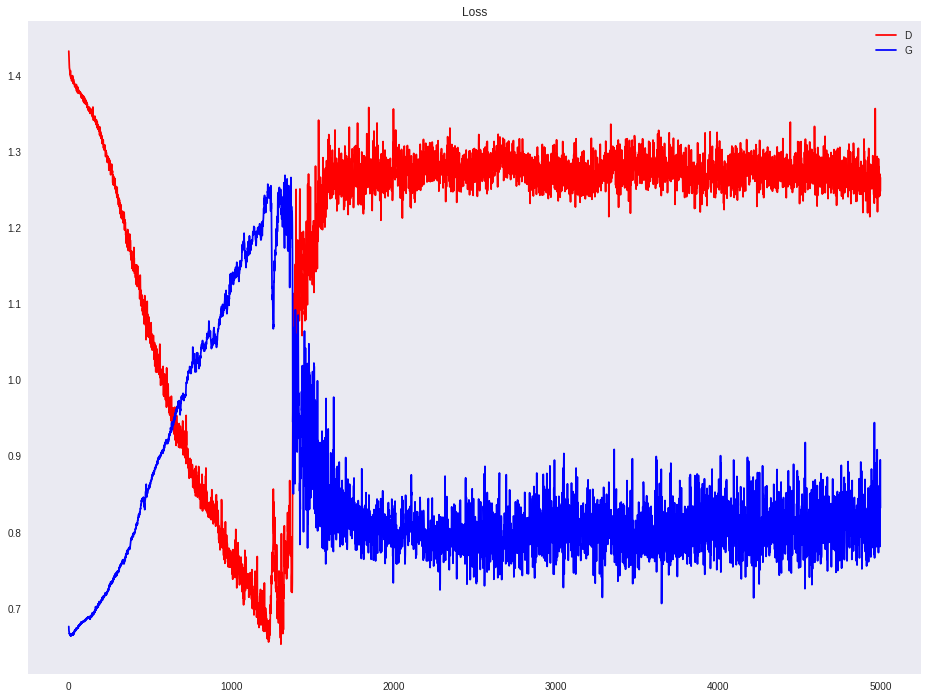

In [165]:
plt.plot(log_loss_d, label='D', c='r')
plt.plot(log_loss_g, label='G', c='b')
plt.legend()
plt.title('Loss')
plt.show()

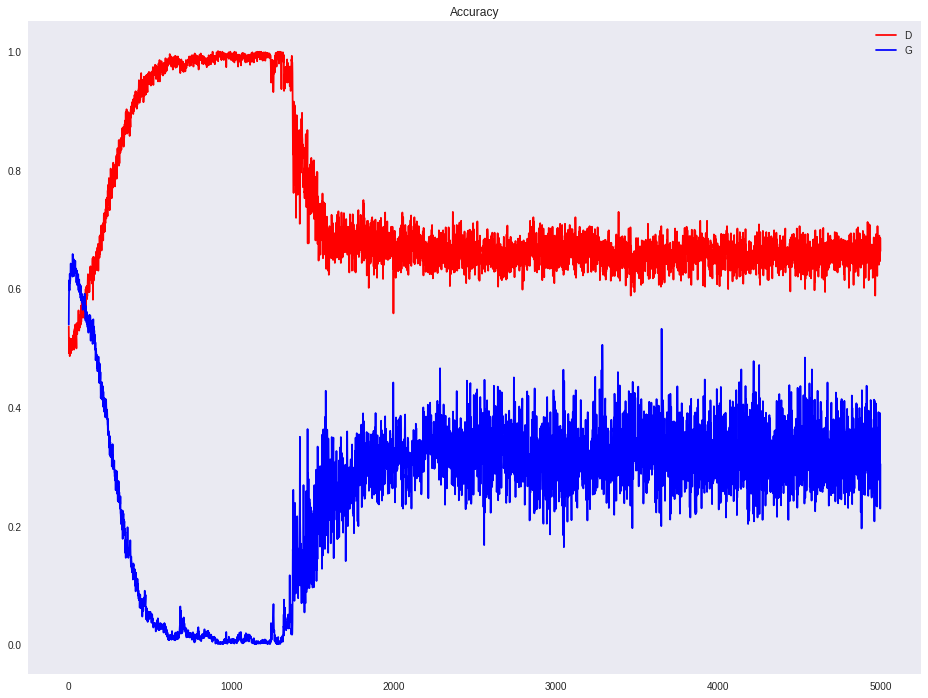

In [166]:
plt.plot(log_acc_d, label='D', c='r')
plt.plot(log_acc_g, label='G', c='b')
plt.legend()
plt.title('Accuracy')
plt.show()

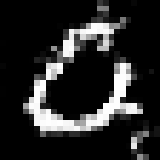

In [196]:
generator.eval()
discriminator.eval()

z_noise = torch.FloatTensor(X.shape[0], input_dim).normal_(0, 0.05).cuda()
X_fake = generator(Variable(z_noise))

img = X_fake[0, 0, :].cpu().data.numpy()

Image.fromarray((255*(img + 1)/2).astype(np.uint8)).resize((160, 160))

| Smaple 1  | Smaple 2  |
|---|---|
| <img src="images/gan1.png" width=320 />  | <img src="images/gan2.png" width=320 />  |

# Unsupervised Cross-Domain Image Generation
- https://arxiv.org/abs/1611.02200

<img src="images/gan3.png" />

<img src="images/dl.png" />